# Some Simple Time Series
A Summary of lecture "Time Series Analysis in Python", via datacamp

- toc: true
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Time-Series Analysis]
- image:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

# Autocorrelation Function
   - Autocorrelation Function (ACF) : The autocorrelation as a function of the lag

### Taxing Exercise: Compute the ACF
In the last chapter, you computed autocorrelations with one lag. Often we are interested in seeing the autocorrelation over many lags. The quarterly earnings for H&R Block (ticker symbol HRB) is plotted on the right, and you can see the extreme cyclicality of its earnings. A vast majority of its earnings occurs in the quarter that taxes are due.

You will compute the array of autocorrelations for the H&R Block quarterly earnings. Then, plot the autocorrelation function using the ```plot_acf module```. This plot shows what the autocorrelation function looks like for cyclical earnings data. The ACF at ```lag=0``` is always one, of course. In the next exercise, you will learn about the confidence interval for the ACF, but for now, suppress the confidence interval by setting ```alpha=1.```

  - Preprocess

In [10]:
HRB = pd.read_csv('C:/xampp/htdocs/time_series/HRB.csv', index_col=0)
HRB.index = pd.to_datetime(HRB.index) + pd.offsets.QuarterBegin(startingMonth=1)
HRB.head()

C:\Users\hi\AppData\Local\Temp\ipykernel_19328\1059392998.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  HRB.index = pd.to_datetime(HRB.index) + pd.offsets.QuarterBegin(startingMonth=1)


,Earnings
Quarter,
2007-04-01,-0.36
2007-07-01,-0.38
2007-10-01,0.07
2008-01-01,1.85
2008-04-01,-0.34


<Axes: xlabel='Quarter'>

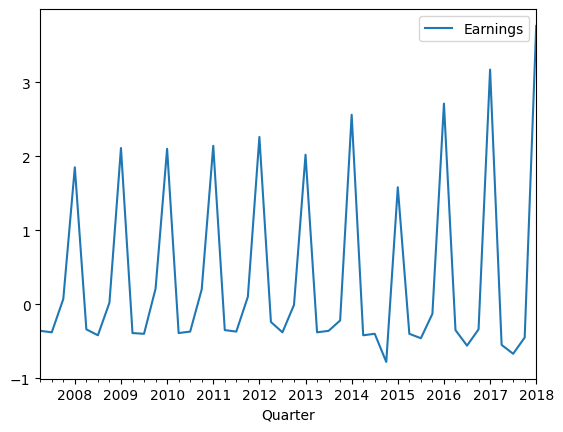

In [11]:
HRB.plot()

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259 ]


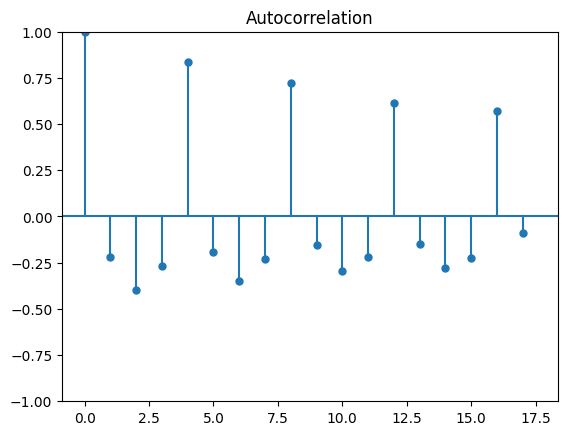

In [12]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha=1);

### Are We Confident This Stock is Mean Reverting?
In the last chapter, you saw that the autocorrelation of MSFT's weekly stock returns was -0.16. That autocorrelation seems large, but is it statistically significant? In other words, can you say that there is less than a 5% chance that we would observe such a large negative autocorrelation if the true autocorrelation were really zero? And are there any autocorrelations at other lags that are significantly different from zero?

Even if the true autocorrelations were zero at all lags, in a finite sample of returns you won't see the estimate of the autocorrelations exactly zero. In fact, the standard deviation of the sample autocorrelation is $\frac{1}{\sqrt{N}}$ where $N$ is the number of observations, so if $N=100$, for example, the standard deviation of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 standard deviations from the mean, the 95% confidence interval is $\pm \frac{1.96}{\sqrt{N}}$. This approximation only holds when the true autocorrelations are all zero.

- Preprocess

In [20]:
MSFT = pd.read_csv('C:/xampp/htdocs/time_series/MSFT.csv', index_col=0)
MSFT.index = pd.to_datetime(MSFT.index, format="%m/%d/%Y")
MSFT.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [21]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W').last()

# Compute the percentage change of prices
returns = MSFT.pct_change().dropna()

The autocorrelation of weekly MSFT returns is -0.16
The approximate confidence interval is +/- 0.12


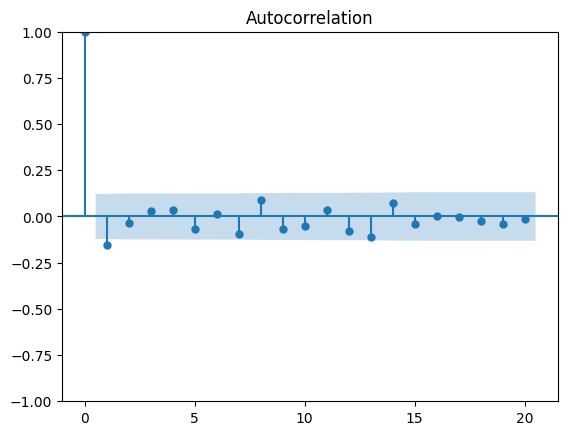

In [22]:
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96 / sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" % (conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20);

## White Noise
- What is White Noise?
    - White Noise is a series with:
        - Constant mean
        - Constant variance
        - Zero autocorrelation at all lags
    - Special Case: if data has normal distribution, then Guassian White Noise

### Can't Forecast White Noise
A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. Stock returns are often modeled as white noise. Unfortunately, for white noise, we cannot forecast future observations based on the past - autocorrelations at all lags are zero.

You will generate a white noise series and plot the autocorrelation function to show that it is zero for all lags. You can use ```np.random.normal()``` to generate random returns. For a Gaussian white noise process, the mean and standard deviation describe the entire process.

Plot this white noise series to see what it looks like, and then plot the autocorrelation function.

The mean is 0.019 and the standard deviation is 0.050


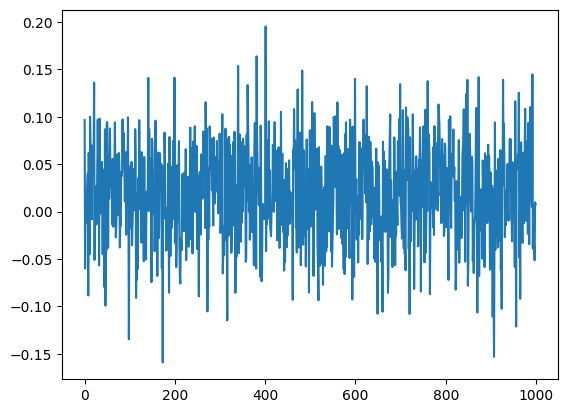

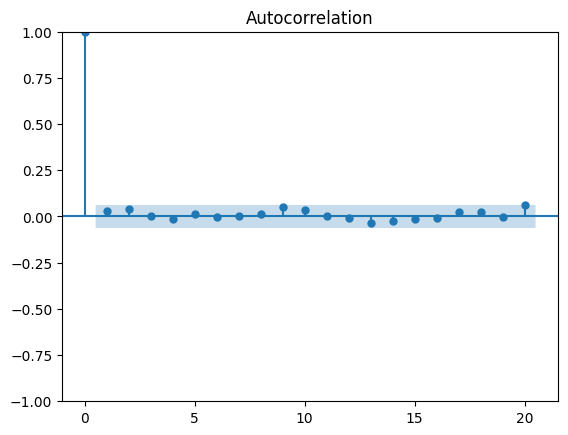

In [7]:
# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" % (mean, std))

# Plot return series
plt.plot(returns);

# Plot autocorrelation functino of white noise returns
plot_acf(returns, lags=20);

## Random Walk
- What is a Random Walk?
    - Today's Price = Yesterday's Price + Noise
$$ P_t = P_{t-1} + \epsilon_t$$
        - Change in price is white noise
$$ P_t - P_{t-1} = \epsilon_t $$
        - Cannot forecast a random walk
        - Best forecast for tomorrow's price is today's price
    - Random Walk with drift:
$$ P_t = \mu + P_{t-1} + \epsilon_t $$
        - Change in price is white noise with non-zero mean:
$$ P_t - P_{t-1} = \mu + \epsilon_t $$
- Statistical Test for Random Walk
    - Random walk with drift
$$ P_t = \mu + P_{t-1} + \epsilon_t $$
    - Regression test for random walk
$$ P_t = \alpha + \beta P_{t-1} + \epsilon_t $$
    - It is equivalent to:
$$ P_t - P_{t-1} = \alpha + \beta P_{t-1} + \epsilon_t $$
    - Test: 
        - $H_0 : \beta = 0$ (random walk)
        - $H_1 : \beta < 0$ (not random walk)

### Generate a Random Walk
Whereas stock returns are often modeled as white noise, stock prices closely follow a random walk. In other words, today's price is yesterday's price plus some random noise.

You will simulate the price of a stock over time that has a starting price of 100 and every day goes up or down by a random amount. Then, plot the simulated stock price. If you hit the "Run Code" code button multiple times, you'll see several realizations.

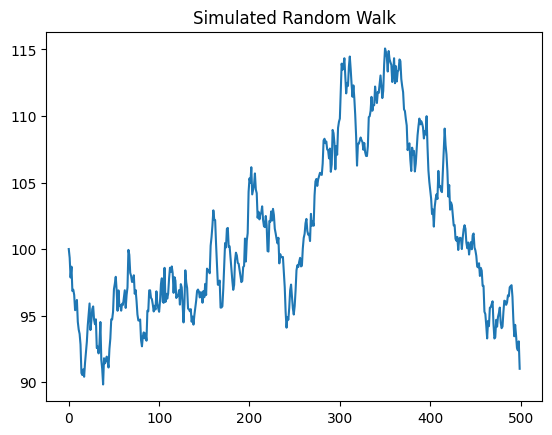

In [8]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0] = 0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P);
plt.title("Simulated Random Walk");

### Get the Drift
In the last exercise, you simulated stock prices that follow a random walk. You will extend this in two ways in this exercise.

- You will look at a random walk with a drift. Many time series, like stock prices, are random walks but tend to drift up over time.
- In the last exercise, the noise in the random walk was additive: random, normal changes in price were added to the last price. However, when adding noise, you could theoretically get negative prices. Now you will make the noise multiplicative: you will add one to the random, normal changes to get a total return, and multiply that by the last price.

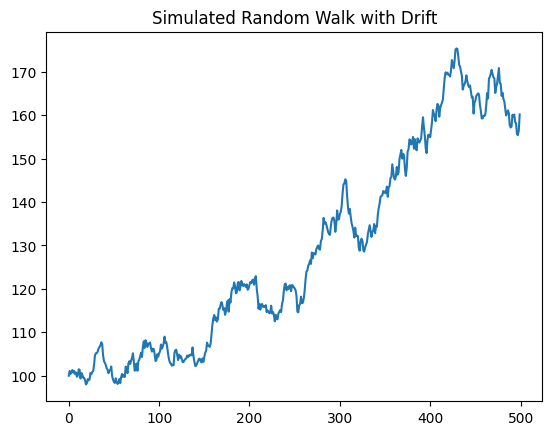

In [9]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0] = 1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P);
plt.title("Simulated Random Walk with Drift");

### Are Stock Prices a Random Walk?
Most stock prices follow a random walk (perhaps with a drift). You will look at a time series of Amazon stock prices, and run the 'Augmented Dickey-Fuller Test' from the statsmodels library to show that it does indeed follow a random walk.

With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

- Preprocess

In [13]:
AMZN = pd.read_csv('C:/xampp/htdocs/time_series/AMZN.csv', index_col=0)
AMZN.index = pd.to_datetime(AMZN.index, format='%m/%d/%Y')
AMZN.head()

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


In [14]:
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(np.float64(4.025168525770737), 1.0, 33, 5054, {'1%': np.float64(-3.4316445438146865), '5%': np.float64(-2.862112049726916), '10%': np.float64(-2.5670745025321304)}, np.float64(30308.64216426981))
The p-value of the test on prices is: 1.0


### How About Stock Returns?
In the last exercise, you showed that Amazon stock prices, contained in the DataFrame AMZN follow a random walk. In this exercise. you will do the same thing for Amazon returns (percent change in prices) and show that the returns do not follow a random walk.

In [15]:
# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.565589808347514e-22


## Stationarity
- What is Stationary?
    - Strong stationary: entire distribution of data is time-invariant
    - Weak stationary: mean, variance and autocorrelation are time-invariant.
    
    (i.e., for autocorrelation, $corr(X_t, X_{t-\tau})$ is only a function of $\tau$)
- Why do we care?
    - If parameters vary with time, too many paramters to estimate
    - Can only estimate a parsimonious model with a few parameters

### Seasonal Adjustment During Tax Season
Many time series exhibit strong seasonal behavior. The procedure for removing the seasonal component of a time series is called seasonal adjustment. For example, most economic data published by the government is seasonally adjusted.

You saw earlier that by taking first differences of a random walk, you get a stationary white noise process. For seasonal adjustments, instead of taking first differences, you will take differences with a lag corresponding to the periodicity.

Look again at the ACF of H&R Block's quarterly earnings, and there is a clear seasonal component. The autocorrelation is high for lags 4,8,12,16,... because of the spike in earnings every four quarters during tax season. Apply a seasonal adjustment by taking the fourth difference (four represents the periodicity of the series). Then compute the autocorrelation of the transformed series.

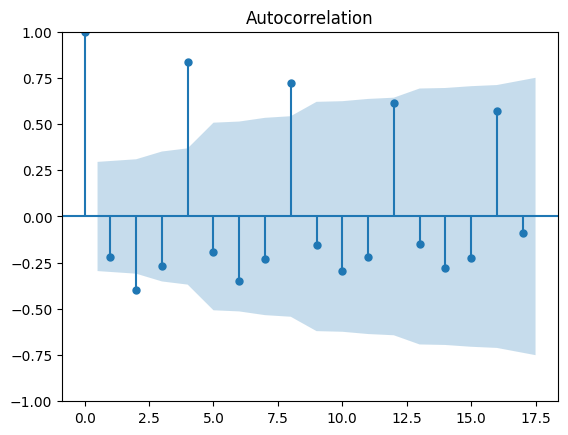

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(df['Earnings'])
plt.show()

            Earnings
Quarter             
2007-01-01       NaN
2007-04-01       NaN
2007-07-01       NaN
2007-10-01       NaN
2008-01-01      0.02
2008-04-01     -0.04
2008-07-01     -0.05
2008-10-01      0.26
2009-01-01     -0.05
2009-04-01      0.02


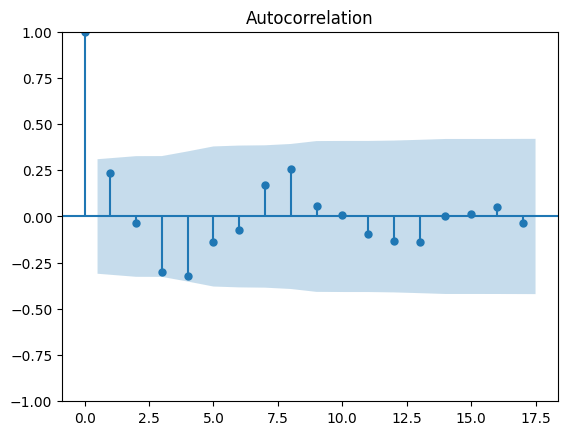

In [40]:
# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa);